In [1]:
import pandas as pd
import numpy as np
file_path ='./cafedata/chungnam-pricedata.csv'
df = pd.read_csv(file_path)
df.head()

,뚜레쥬르 지점,뚜레쥬르 공주신월,뚜레쥬르 공주중앙,뚜레쥬르 논산하나로장군마트,뚜레쥬르 논산반월,뚜레쥬르 당진수청,뚜레쥬르 충남부여,뚜레쥬르 서산예천,뚜레쥬르 아산북수,뚜레쥬르 아산터미널,...,뚜레쥬르 홍성삼성마트,뚜레쥬르 천안두정아크로텔,뚜레쥬르 천안쌍용역,뚜레쥬르 대전둔산법원,뚜레쥬르 대전둔산샘머리,뚜레쥬르 대전사학연금,뚜레쥬르 대전도안상대,뚜레쥬르 대전오류중앙,뚜레쥬르 대전버드내,뚜레쥬르 대전태평
0,마늘 단짝 고구마,NaN,NaN,NaN,NaN,4900.0,4900.0,4900.0,4900.0,4900.0,...,4900.0,5400.0,4900.0,4900.0,4900.0,4900.0,4900.0,4900.0,NaN,4900.0
1,깊은 밤 뺑스위스,4900.0,NaN,4900.0,4900.0,4300.0,4300.0,4300.0,4300.0,4300.0,...,4300.0,4700.0,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,4000.0,4300.0
2,BELT 샌드위치,4300.0,4300.0,4300.0,4300.0,6900.0,6900.0,6900.0,NaN,6900.0,...,7300.0,8300.0,6900.0,6900.0,6900.0,6900.0,NaN,7200.0,NaN,6900.0
3,BLT콥 샐러드,NaN,6900.0,6900.0,6900.0,NaN,NaN,NaN,NaN,8500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9500.0,8200.0,8500.0
4,쉬림프 에그 샐러드,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7300.0,NaN,NaN,10500.0,8200.0,NaN


In [2]:
import re

def categorize_menu(df):
    # 키워드 기반 카테고리 매핑 딕셔너리
    category_keywords = {
        '샌드위치류': ['샌드위치', 'BELT', 'BLT', 'V.E.L.T'],
        '샐러드류': ['샐러드'],
        '식빵류': ['식빵', '우유롤', '우유 브레드', '소버식빵'],
        '크림빵': ['크림가득 메론빵','마담 얼그레이 크림번','순진우유크림빵','겹겹이 연유 크림 데니쉬','사르르 고구마케이크빵','사르르 우유크림빵','빵속에리얼초코','카페모카크림빵','까까웨뜨'],
        '피자빵,고로케': ['고로케', '소시지브레드','피자토스트','NEW어니언소시지포카치아'],
        '파이/패스트리': ['바통쉬크레','크라상','애플파이','유자파이'],
        '간식빵': ['소금버터롤','치즈방앗간','깨찰빵','소보로빵','오리지널 커피번','카페모카빵','꽈배기','옛날 단팥 도넛',r'^단팥빵$','단팥소보로빵'],
        '신제품': ['마구마구', '단짝', '뺑스위스']
    }
    
    # 새로운 카테고리 컬럼 생성
    df['카테고리'] = '기타'  # 기본값
    
    # 각 메뉴명에 대해 카테고리 매핑
    for idx, menu_name in enumerate(df['뚜레쥬르 지점']):
        if pd.isna(menu_name):  # null 체크
            continue
            
        menu_name = str(menu_name).lower()  # 소문자 변환
        
        # 각 카테고리의 키워드 체크
        for category, keywords in category_keywords.items():
            if any(keyword.lower() in menu_name for keyword in keywords):
                df.loc[idx, '카테고리'] = category
                break
    
    return df

def analyze_categories_by_store(df):
    # 매장별 카테고리별 기본 통계
    stores = df.columns[1:-1]  # 첫 번째 열(메뉴명)과 마지막 열(카테고리) 제외
    
    # 카테고리별 기본 통계
    category_stats = pd.DataFrame()
    
    for store in stores:
        # 매장별 데이터 숫자로 변환 (오류 방지)
        df[store] = pd.to_numeric(df[store], errors='coerce')
        
        temp = df.groupby('카테고리').agg({store: 'mean'})
        temp.reset_index(inplace=True)
        temp.rename(columns={store: '평균 가격'}, inplace=True)
        temp['매장명'] = store
        category_stats = pd.concat([category_stats, temp], axis=0)

    return category_stats

def pivot_store_category(stats):
    # 피벗 테이블 생성
    pivot_table = stats.pivot_table(index='매장명', columns='카테고리', values='평균 가격', aggfunc='mean')
    pivot_table=pivot_table.round(1)
    pivot_table.reset_index(inplace=True)
    return pivot_table

# 데이터 로드 및 처리
def process_bakery_data(filepath):
    # CSV 파일 읽기
    df = pd.read_csv(filepath)
    
    # 카테고리 지정
    df = categorize_menu(df)
    
    # 매장별 카테고리별 분석
    stats = analyze_categories_by_store(df)
    
    # 피벗 테이블 생성
    pivot_table = pivot_store_category(stats)
    
    return df, pivot_table

# 파일 처리 및 결과 생성
df, pivot_table = process_bakery_data(file_path)

# 카테고리화된 데이터 및 매장별 통계 표시
from IPython.display import display

# print("카테고리화된 가격 데이터 (처음 5개 행)")
# display(df.head())
########################################################################################################################

storeinfo_filepath='./뚜레쥬르_매장정보_충청남도_수정.csv'

def process_address(address):
    try:
        # 수동 수정
        if address == '경기도 동탄지성로469번길 60 5단지 상가1동107호,108호,109호':
            return '경기도 화성시'
   
        # 정규표현식으로 '충청남도 XX시' 추출
        match = re.match(r'충청남도 \w+시', address) or re.match(r'충청남도 \w+군', address) or re.match(r'대전광역시\s+\w+구', address) or re.match(r'대전광역시\s+\w+군', address)

        if match:
            return match.group()
        
        # 기본값 반환
        return address
    except Exception as e:
        print(f"주소 처리 중 오류 발생: {address}, {e}")
        return address

def load_store_info(storeinfo_filepath):
    store_info = pd.read_csv(storeinfo_filepath)
    # 주소 컬럼 처리
    store_info['주소'] = store_info['주소'].apply(process_address)
    return store_info



def process_bakery_data(price_filepath, store_info_filepath):
    # 가격 데이터 로드
    df = pd.read_csv(price_filepath)
    
    # 매장 정보 데이터 로드
    store_info = load_store_info(store_info_filepath)
    
    # 카테고리 지정
    df = categorize_menu(df)
    
    # 매장별 카테고리별 분석
    stats = analyze_categories_by_store(df)
    
    # 피벗 테이블 생성 후 매장 정보 병합
    pivot_table = pivot_store_category(stats)
    result = pd.merge(pivot_table, store_info, 
                     left_on='매장명', 
                     right_on='매장', 
                     how='left')
    
    # 컬럼 순서 재정렬
    columns = ['매장명', '주소', '지역'] + [col for col in result.columns 
              if col not in ['매장명', '매장', '주소', '지역']]
    result = result[columns]
    
    return df, result

# 실제 파일 경로로 호출
df, result = process_bakery_data('./cafedata/chungnam-pricedata.csv', 
                                './adress_process/뚜레쥬르_매장정보_충청남도_수정.csv')

# 결과 출력
print("\n매장별 카테고리별 평균 가격 (주소 정보 포함)")
display(result)


매장별 카테고리별 평균 가격 (주소 정보 포함)


,매장명,주소,지역,간식빵,기타,샌드위치류,샐러드류,식빵류,신제품,크림빵,파이/패스트리,"피자빵,고로케"
0,뚜레쥬르 공주신월,충청남도 공주시,충남,3660.0,3597.1,3250.0,4700.0,4250.0,4900.0,4175.0,4233.3,2875.0
1,뚜레쥬르 공주중앙,충청남도 공주시,충남,3783.3,3842.9,6640.0,5300.0,4591.7,NaN,3525.0,3200.0,3133.3
2,뚜레쥬르 논산반월,충청남도 논산시,충남,3862.5,3923.9,6880.0,5300.0,5150.0,5250.0,3200.0,4075.0,3133.3
3,뚜레쥬르 논산하나로장군마트,충청남도 논산시,충남,3922.2,4407.8,6600.0,NaN,5191.7,4900.0,3928.6,3400.0,3133.3
4,뚜레쥬르 당진수청,충청남도 당진시,충남,3215.4,4209.4,7160.0,8400.0,5030.8,5033.3,3571.4,2900.0,3183.3
5,뚜레쥬르 대전도안상대,대전광역시 유성구,충남,2920.0,3992.5,7100.0,NaN,4630.0,4600.0,3280.0,3000.0,3260.0
6,뚜레쥬르 대전둔산법원,대전광역시 서구,충남,2922.2,4506.5,7261.5,9300.0,5050.0,4966.7,3583.3,3200.0,3200.0
7,뚜레쥬르 대전둔산샘머리,대전광역시 서구,충남,3011.1,4229.8,7166.7,7300.0,4760.0,4600.0,3700.0,3033.3,3266.7
8,뚜레쥬르 대전버드내,대전광역시 중구,충남,2972.7,3512.1,7766.7,8200.0,5071.4,4000.0,3260.0,2950.0,3166.7
9,뚜레쥬르 대전사학연금,대전광역시 서구,충남,3450.0,3943.8,7185.7,8300.0,5080.0,4600.0,3300.0,NaN,3100.0


In [3]:
grouped_data = result.groupby('주소')[['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']].mean().mean(axis=1).sort_values(ascending=False)

# groupby 결과를 데이터프레임으로 변환
grouped_df = pd.DataFrame(grouped_data).reset_index()

# 컬럼명 변경
grouped_df.columns = ['주소', '평균가격']

# CSV 파일로 저장
grouped_df.to_csv('anal_chungnam/시별_빵_평균가격.csv', index=False, encoding='utf-8-sig')
grouped_df

,주소,평균가격
0,충청남도 천안시,5139.480208
1,대전광역시 중구,4881.483333
2,충청남도 아산시,4868.616667
3,충청남도 당진시,4811.775000
4,대전광역시 서구,4768.910417
5,충청남도 논산시,4576.662500
6,충청남도 서산시,4300.957143
7,충청남도 부여군,4254.728571
8,충청남도 홍성군,4200.850000
9,충청남도 공주시,4194.787500


In [4]:
categories = ['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']

# 각 카테고리별로 구의 평균 가격 계산
grouped_data = {}
for category in categories:
    grouped_data[category] = result.groupby('주소')[category].mean().round(2)

# 데이터프레임 생성
grouped_df = pd.DataFrame(grouped_data)

# CSV 파일로 저장
grouped_df.to_csv('anal_chungnam/시군별_카테고리_평균가격.csv', encoding='utf-8-sig')
grouped_df

,간식빵,샌드위치류,샐러드류,식빵류,신제품,크림빵,파이/패스트리,"피자빵,고로케"
주소,,,,,,,,
대전광역시 서구,3127.77,7204.63,8300.00,4963.33,4722.23,3527.77,3116.65,3188.90
대전광역시 유성구,2920.00,7100.00,NaN,4630.00,4600.00,3280.00,3000.00,3260.00
대전광역시 중구,3005.13,7494.67,9350.00,5064.63,4511.10,3400.93,2994.43,3230.97
충청남도 공주시,3721.65,4945.00,5000.00,4420.85,4900.00,3850.00,3716.65,3004.15
충청남도 논산시,3892.35,6740.00,5300.00,5170.85,5075.00,3564.30,3737.50,3133.30
충청남도 당진시,3215.40,7160.00,8400.00,5030.80,5033.30,3571.40,2900.00,3183.30
충청남도 부여군,3027.30,7100.00,NaN,4912.50,4933.30,3660.00,2966.70,3183.30
충청남도 서산시,3266.70,7166.70,NaN,4725.00,4933.30,3775.00,3000.00,3240.00
충청남도 아산시,3194.73,7308.33,8400.00,5195.23,4600.00,3703.97,3216.67,3330.00


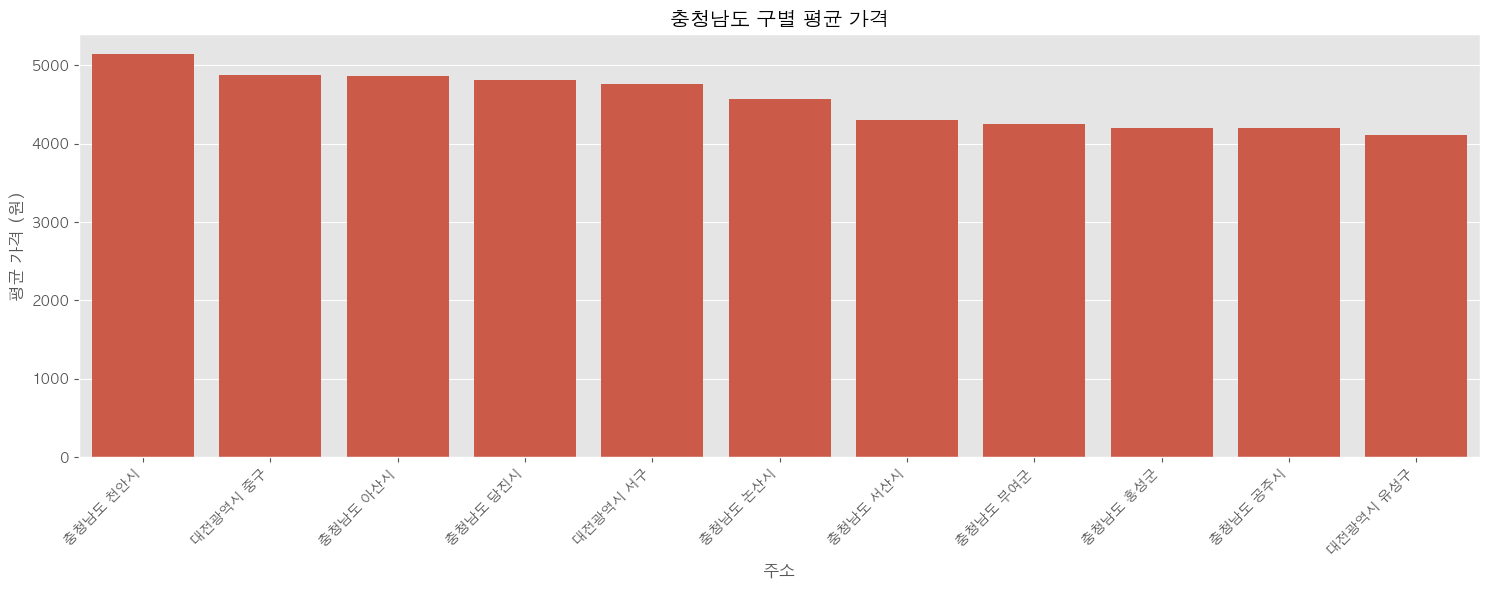

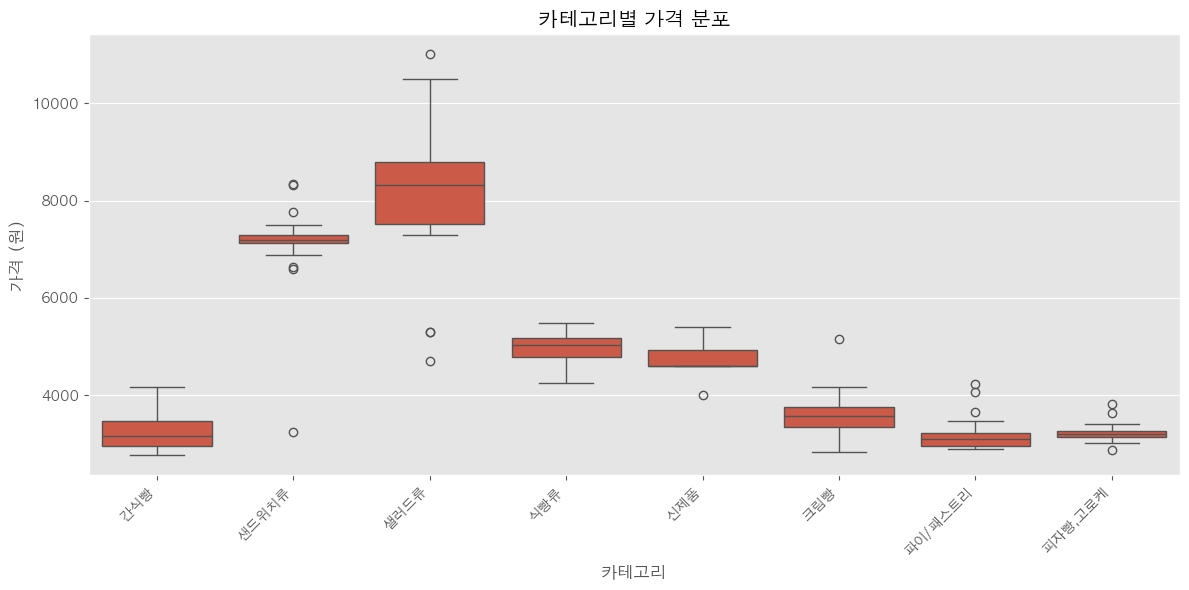

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc

# Mac OS 용 폰트 설정
plt.rc('font', family='AppleGothic') # 맥용 폰트 설정

# 그래프 기본 설정
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')


# 1. 구별 전체 평균 가격 분석
plt.figure(figsize=(15, 6))
grouped_data = result.groupby('주소')[['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']].mean().mean(axis=1).sort_values(ascending=False)

sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.title('충청남도 구별 평균 가격')
plt.xticks(rotation=45, ha='right')
plt.ylabel('평균 가격 (원)')
plt.tight_layout()
plt.show()

# 2. 카테고리별 가격 분포 (박스플롯)
plt.figure(figsize=(12, 6))
categories = ['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']
data_melted = pd.melt(result, value_vars=categories)

sns.boxplot(x='variable', y='value', data=data_melted)
plt.title('카테고리별 가격 분포')
plt.xticks(rotation=45, ha='right')
plt.xlabel('카테고리')
plt.ylabel('가격 (원)')
plt.tight_layout()
plt.show()

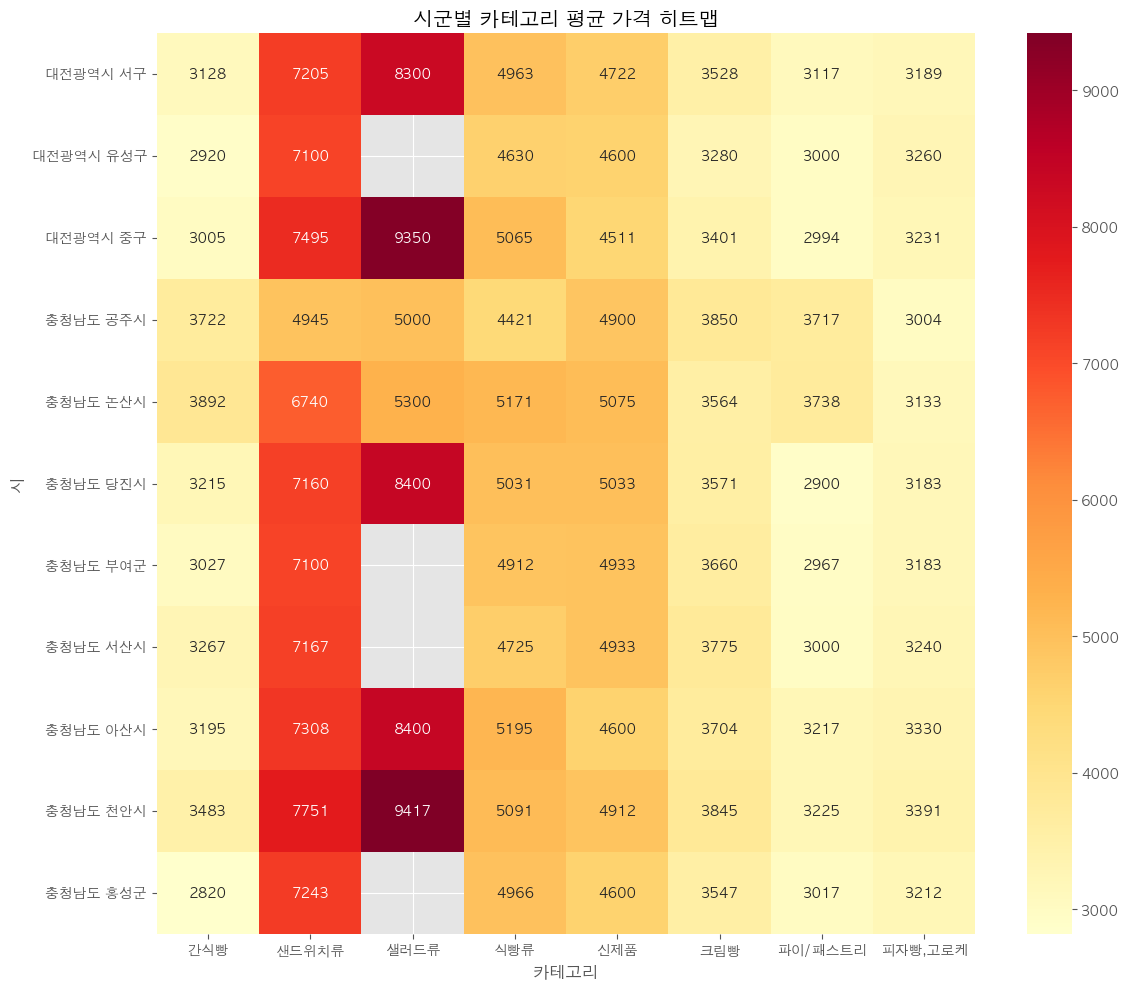

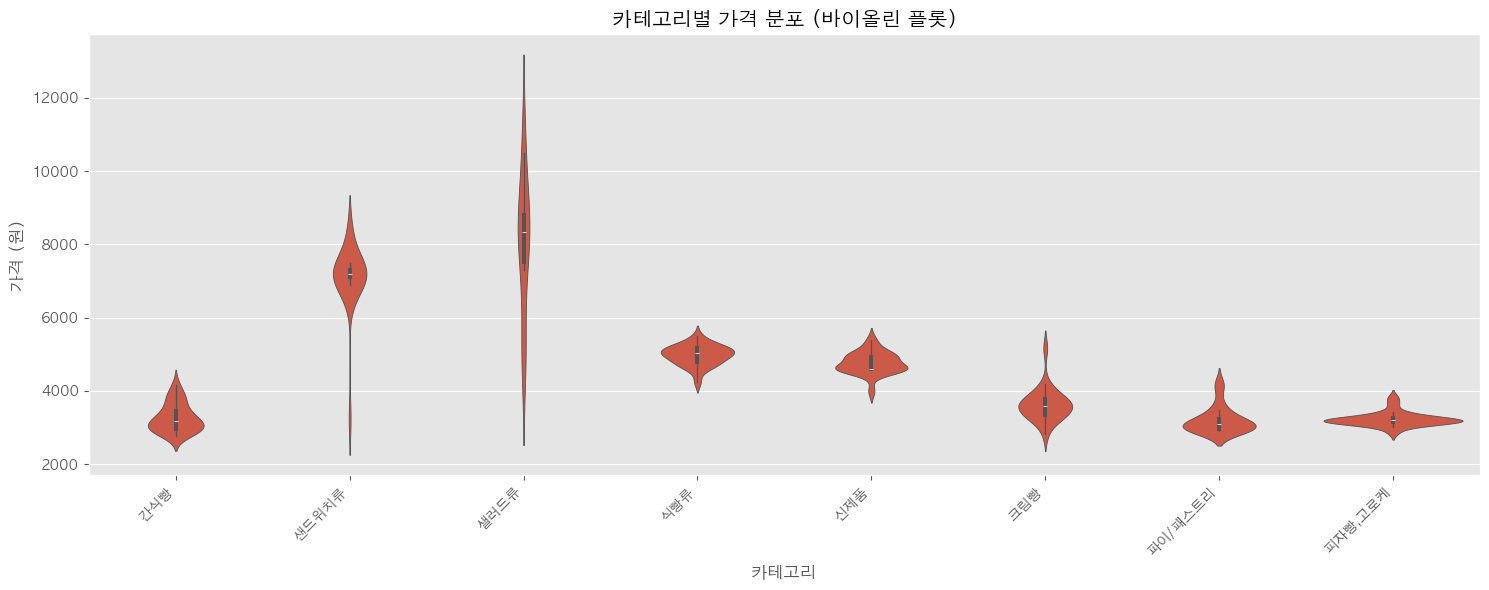

In [6]:

# 3. 구별/카테고리별 평균 가격 히트맵
plt.figure(figsize=(12, 10))
pivot_data = result.groupby('주소')[categories].mean()
sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('시군별 카테고리 평균 가격 히트맵')
plt.ylabel('시')
plt.xlabel('카테고리')
plt.tight_layout()
plt.show()

# 5. 카테고리별 가격 분포 (바이올린 플롯)
plt.figure(figsize=(15, 6))
sns.violinplot(x='variable', y='value', data=data_melted)
plt.title('카테고리별 가격 분포 (바이올린 플롯)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('카테고리')
plt.ylabel('가격 (원)')
plt.tight_layout()
plt.show()

전처리 후 구별 빵가격 데이터:
           구분       평균_빵가격
0    대전광역시 서구  4768.910417
1   대전광역시 유성구  4112.857143
2    대전광역시 중구  4881.483333
3         공주시  4194.787500
4         논산시  4576.662500
5         당진시  4811.775000
6         부여군  4254.728571
7         서산시  4300.957143
8         아산시  4868.616667
9         천안시  5139.480208
10        홍성군  4200.850000

전처리 후 아파트 가격 데이터:
           구분      매매   전세
1         계룡시   714.0  526
2         공주시   633.0  442
3         금산군   514.0  372
4         논산시   616.0  446
5         당진시   624.0  496
6         보령시   573.0  433
7         부여군   552.0  407
8         서산시   549.0  442
9         서천군   418.0  278
10        아산시   726.0  539
11        예산군   480.0  324
12        천안시   748.0  574
13        청양군   481.0  196
14        태안군   454.0  327
15        홍성군   577.0  429
16  대전광역시 대덕구   811.0  526
17   대전광역시 동구   880.0  442
18   대전광역시 서구  1247.0  372
19  대전광역시 유성구  1303.0  446
20   대전광역시 중구  1015.0  496

병합된 데이터:
           구분       평균_빵가격      매매
0    대전광역시 서구  4768.910417 

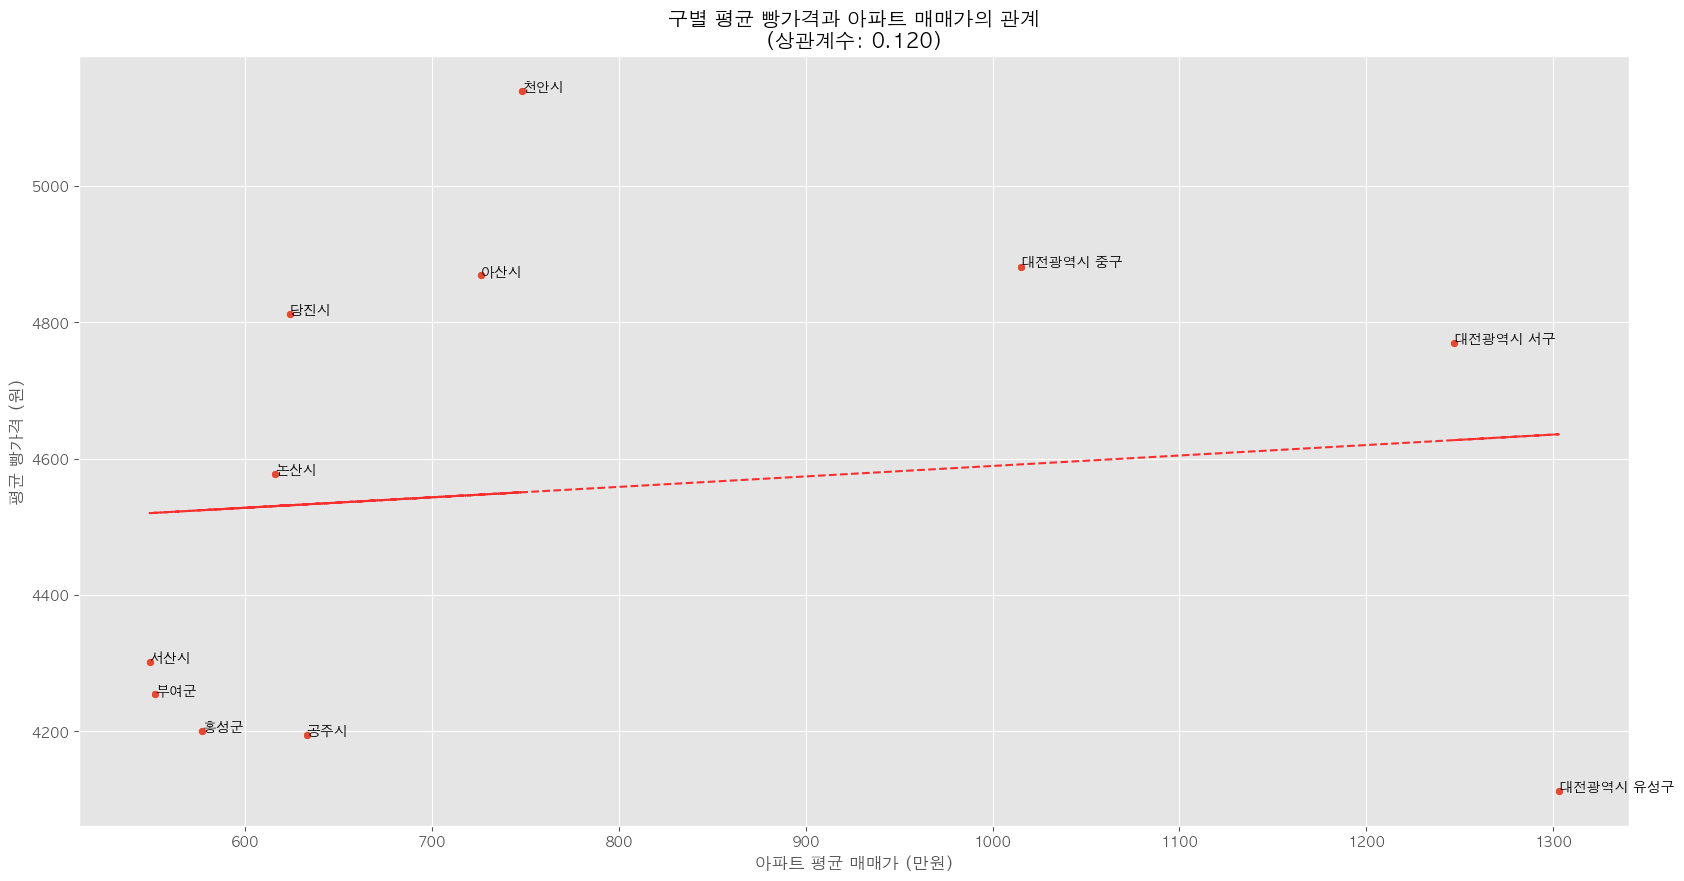

In [7]:
# 1. 구별 평균 빵가격 계산
categories = ['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']
bread_price_by_district = result.groupby('주소')[categories].mean().mean(axis=1).reset_index()
bread_price_by_district.columns = ['구분', '평균_빵가격']
# '충청남도'제거
bread_price_by_district['구분'] = bread_price_by_district['구분'].str.replace('충청남도', '').str.strip()

# 아파트 가격 데이터 전처리
apt_price = pd.read_csv('anal_chungnam/chungnam_APT_PRICE.csv')
# '충청남도'와 '구' 제거
apt_price['구분'] = apt_price['구분'].str.replace('충청남도', '').str.strip()

apt_price['매매'] = pd.to_numeric(apt_price['매매'].str.replace(',', ''), errors='coerce')
apt_price = apt_price.dropna()  # 결측치 제거


# 데이터 확인
print("전처리 후 구별 빵가격 데이터:")
print(bread_price_by_district)
print("\n전처리 후 아파트 가격 데이터:")
print(apt_price)

# 데이터 병합
merged_df = pd.merge(bread_price_by_district, apt_price[['구분', '매매']], on='구분', how='inner')
print("\n병합된 데이터:")
print(merged_df)

# 시각화
if not merged_df.empty:
    plt.figure(figsize=(20, 10))
    sns.scatterplot(data=merged_df, x='매매', y='평균_빵가격')
    
    # 추세선 추가
    x = merged_df['매매'].values
    y = merged_df['평균_빵가격'].values
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), "r--", alpha=0.8)
    
    # 각 점에 구 이름 표시
    for idx, row in merged_df.iterrows():
        plt.annotate(row['구분'], (row['매매'], row['평균_빵가격']))
    
    correlation = merged_df['평균_빵가격'].corr(merged_df['매매'])
    plt.title(f'구별 평균 빵가격과 아파트 매매가의 관계\n(상관계수: {correlation:.3f})')
    plt.xlabel('아파트 평균 매매가 (만원)')
    plt.ylabel('평균 빵가격 (원)')

    print(f"\n상관계수: {correlation:.3f}")
    if correlation > 0:
        print("양의 상관관계가 있습니다: 아파트 가격이 높은 구일수록 빵 가격도 높은 경향이 있습니다.")
    else:
        print("음의 상관관계가 있습니다: 아파트 가격이 높은 구일수록 빵 가격이 낮은 경향이 있습니다.")

In [8]:
cbile_path ='./cafedata/chungbuk-pricedata.csv'
cbdf = pd.read_csv(cbile_path)
cbdf.head()

,뚜레쥬르 지점,뚜레쥬르 충북음성,뚜레쥬르 제천하소로,뚜레쥬르 증평하나로마트,뚜레쥬르 진천성모병원,뚜레쥬르 청원내수,뚜레쥬르 청주용암현대,뚜레쥬르 청주용암부영,뚜레쥬르 청주모충,뚜레쥬르 청주율량,뚜레쥬르 청주가경,뚜레쥬르 청주테크노폴리스,뚜레쥬르 서충주파라뷰,뚜레쥬르 충주용산호암,뚜레쥬르 충북옥천,뚜레쥬르 충북금왕중앙
0,마늘 단짝 고구마,4900.0,4900.0,4900.0,4900.0,4900.0,4900.0,4900.0,4900.0,4900.0,NaN,4900.0,4900.0,4900.0,4900.0,4900.0
1,깊은 밤 뺑스위스,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,NaN,4300.0,4300.0,4300.0,4300.0
2,BELT 샌드위치,6900.0,6900.0,6900.0,6900.0,6900.0,6900.0,6900.0,6900.0,6900.0,6900.0,NaN,6900.0,6900.0,NaN,6900.0
3,BLT콥 샐러드,NaN,8500.0,NaN,NaN,8500.0,NaN,NaN,NaN,NaN,NaN,8500.0,NaN,NaN,NaN,8500.0
4,쉬림프 에그 샐러드,NaN,NaN,NaN,NaN,NaN,10500.0,NaN,NaN,NaN,NaN,NaN,10500.0,NaN,NaN,NaN


In [9]:
# import re

def categorize_menu(gbdf):
    # 키워드 기반 카테고리 매핑 딕셔너리
    category_keywords = {
        '샌드위치류': ['샌드위치', 'BELT', 'BLT', 'V.E.L.T'],
        '샐러드류': ['샐러드'],
        '식빵류': ['식빵', '우유롤', '우유 브레드', '소버식빵'],
        '크림빵': ['크림가득 메론빵','마담 얼그레이 크림번','순진우유크림빵','겹겹이 연유 크림 데니쉬','사르르 고구마케이크빵','사르르 우유크림빵','빵속에리얼초코','카페모카크림빵','까까웨뜨'],
        '피자빵,고로케': ['고로케', '소시지브레드','피자토스트','NEW어니언소시지포카치아'],
        '파이/패스트리': ['바통쉬크레','크라상','애플파이','유자파이'],
        '간식빵': ['소금버터롤','치즈방앗간','깨찰빵','소보로빵','오리지널 커피번','카페모카빵','꽈배기','옛날 단팥 도넛',r'^단팥빵$','단팥소보로빵'],
        '신제품': ['마구마구', '단짝', '뺑스위스']
    }
    
    # 새로운 카테고리 컬럼 생성
    gbdf['카테고리'] = '기타'  # 기본값
    
    # 각 메뉴명에 대해 카테고리 매핑
    for idx, menu_name in enumerate(gbdf['뚜레쥬르 지점']):
        if pd.isna(menu_name):  # null 체크
            continue
            
        menu_name = str(menu_name).lower()  # 소문자 변환
        
        # 각 카테고리의 키워드 체크
        for category, keywords in category_keywords.items():
            if any(keyword.lower() in menu_name for keyword in keywords):
                gbdf.loc[idx, '카테고리'] = category
                break
    
    return gbdf

def analyze_categories_by_store(gbdf):
    # 매장별 카테고리별 기본 통계
    stores = gbdf.columns[1:-1]  # 첫 번째 열(메뉴명)과 마지막 열(카테고리) 제외
    
    # 카테고리별 기본 통계
    category_stats = pd.DataFrame()
    
    for store in stores:
        # 매장별 데이터 숫자로 변환 (오류 방지)
        gbdf[store] = pd.to_numeric(gbdf[store], errors='coerce')
        
        temp = gbdf.groupby('카테고리').agg({store: 'mean'})
        temp.reset_index(inplace=True)
        temp.rename(columns={store: '평균 가격'}, inplace=True)
        temp['매장명'] = store
        category_stats = pd.concat([category_stats, temp], axis=0)

    return category_stats

def pivot_store_category(stats):
    # 피벗 테이블 생성
    pivot_table = stats.pivot_table(index='매장명', columns='카테고리', values='평균 가격', aggfunc='mean')
    pivot_table=pivot_table.round(1)
    pivot_table.reset_index(inplace=True)
    return pivot_table

# 데이터 로드 및 처리
def process_bakery_data(filepath):
    # CSV 파일 읽기
    gbdf = pd.read_csv(filepath)
    
    # 카테고리 지정
    gbdf = categorize_menu(gbdf)
    
    # 매장별 카테고리별 분석
    stats = analyze_categories_by_store(gbdf)
    
    # 피벗 테이블 생성
    pivot_table = pivot_store_category(stats)
    
    return gbdf, pivot_table

# 파일 처리 및 결과 생성
gbdf, pivot_table = process_bakery_data(file_path)

# 카테고리화된 데이터 및 매장별 통계 표시
from IPython.display import display

# print("카테고리화된 가격 데이터 (처음 5개 행)")
# display(gbdf.head())
########################################################################################################################

storeinfo_filepath='./adress_process/뚜레쥬르_매장정보_충청북도_수정.csv'

def process_address(address):
    try:
        # 수동 수정
        if address == '경기도 동탄지성로469번길 60 5단지 상가1동107호,108호,109호':
            return '경기도 화성시'
   
        # 정규표현식으로 '충청북도 XX시' 추출
        match = re.match(r'충청북도\s+\w+시', address) or re.match(r'충청북도\s+\w+군', address) or re.match(r'충청북도\s+\w+구', address) 
        
        if match:
            return match.group()
        
        # 기본값 반환
        return address
    except Exception as e:
        print(f"주소 처리 중 오류 발생: {address}, {e}")
        return address

def load_store_info(storeinfo_filepath):
    store_info = pd.read_csv(storeinfo_filepath)
    # 주소 컬럼 처리
    store_info['주소'] = store_info['주소'].apply(process_address)
    return store_info



def process_bakery_data(price_filepath, store_info_filepath):
    # 가격 데이터 로드
    gbdf = pd.read_csv(price_filepath)
    
    # 매장 정보 데이터 로드
    store_info = load_store_info(store_info_filepath)
    
    # 카테고리 지정
    gbdf = categorize_menu(gbdf)
    
    # 매장별 카테고리별 분석
    stats = analyze_categories_by_store(gbdf)
    
    # 피벗 테이블 생성 후 매장 정보 병합
    pivot_table = pivot_store_category(stats)
    result = pd.merge(pivot_table, store_info, 
                     left_on='매장명', 
                     right_on='매장', 
                     how='left')
    
    # 컬럼 순서 재정렬
    columns = ['매장명', '주소', '지역'] + [col for col in result.columns 
              if col not in ['매장명', '매장', '주소', '지역']]
    result = result[columns]
    
    return gbdf, result

# 실제 파일 경로로 호출
gbdf, result = process_bakery_data('./cafedata/chungbuk-pricedata.csv', 
                                './adress_process/뚜레쥬르_매장정보_충청북도_수정.csv')

# 결과 출력
print("\n매장별 카테고리별 평균 가격 (주소 정보 포함)")
display(result)

result.to_csv('anal_chungbuk/시별_카테고리_평균가격.csv', encoding='utf-8-sig')


매장별 카테고리별 평균 가격 (주소 정보 포함)


,매장명,주소,지역,간식빵,기타,샌드위치류,샐러드류,식빵류,신제품,크림빵,파이/패스트리,"피자빵,고로케"
0,뚜레쥬르 서충주파라뷰,충청북도 충주시,충북,3161.5,4208.9,6230.0,8600.0,5620.0,4600.0,3587.5,3000.0,3100.0
1,뚜레쥬르 제천하소로,충청북도 제천시,충북,3033.3,4275.0,6438.9,10200.0,5294.1,4600.0,3500.0,3066.7,3220.0
2,뚜레쥬르 증평하나로마트,충청북도 증평군,충북,3100.0,4726.7,6700.0,NaN,4983.3,4600.0,3500.0,2933.3,2750.0
3,뚜레쥬르 진천성모병원,충청북도 진천군,충북,3075.0,4340.5,7150.0,3000.0,5010.0,4600.0,3433.3,3200.0,3025.0
4,뚜레쥬르 청원내수,충청북도 청원군,충북,2925.0,4327.5,6733.3,3000.0,5023.1,4600.0,3300.0,3066.7,3100.0
5,뚜레쥬르 청주가경,충청북도 청주시,충북,2920.0,3854.8,7085.7,NaN,4714.3,4300.0,3066.7,2400.0,3180.0
6,뚜레쥬르 청주모충,충청북도 청주시,충북,2975.0,4176.5,7050.0,NaN,5077.8,4600.0,3250.0,2933.3,3025.0
7,뚜레쥬르 청주용암부영,충청북도 청주시,충북,3112.5,4320.0,6542.9,4700.0,5041.7,4600.0,3240.0,3200.0,3025.0
8,뚜레쥬르 청주용암현대,충청북도 청주시,충북,3236.4,4460.9,7220.0,9066.7,5176.9,4600.0,3357.1,2800.0,3040.0
9,뚜레쥬르 청주율량,충청북도 청주시,충북,3020.0,4044.2,7100.0,NaN,5086.7,4600.0,3266.7,2933.3,3040.0


In [10]:
grouped_data = result.groupby('주소')[['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']].mean().mean(axis=1).sort_values(ascending=False)

# groupby 결과를 데이터프레임으로 변환
grouped_df = pd.DataFrame(grouped_data).reset_index()

# 컬럼명 변경
grouped_df.columns = ['주소', '평균가격']

# CSV 파일로 저장
grouped_df.to_csv('anal_chungbuk/시군별_빵_평균가격.csv', index=False, encoding='utf-8-sig')
grouped_df

,주소,평균가격
0,충청북도 제천시,4919.125000
1,충청북도 충주시,4773.718750
2,충청북도 청주시,4484.939583
3,충청북도 옥천군,4198.271429
4,충청북도 증평군,4080.942857
5,충청북도 진천군,4061.662500
6,충청북도 음성군,4021.835714
7,충청북도 청원군,3968.512500


In [11]:
categories = ['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']

# 각 카테고리별로 구의 평균 가격 계산
grouped_data = {}
for category in categories:
    grouped_data[category] = result.groupby('주소')[category].mean().round(2)

# 데이터프레임 생성
grouped_df = pd.DataFrame(grouped_data)

# CSV 파일로 저장
grouped_df.to_csv('anal_chungbuk/시군별_카테고리_평균가격.csv', encoding='utf-8-sig')
grouped_df

,간식빵,샌드위치류,샐러드류,식빵류,신제품,크림빵,파이/패스트리,"피자빵,고로케"
주소,,,,,,,,
충청북도 옥천군,3142.90,7220.00,NaN,4975.00,4600.00,3800.00,2400.00,3250.00
충청북도 음성군,3047.50,6562.10,NaN,5230.75,4833.35,2941.65,2600.00,2937.50
충청북도 제천시,3033.30,6438.90,10200.00,5294.10,4600.00,3500.00,3066.70,3220.00
충청북도 증평군,3100.00,6700.00,NaN,4983.30,4600.00,3500.00,2933.30,2750.00
충청북도 진천군,3075.00,7150.00,3000.00,5010.00,4600.00,3433.30,3200.00,3025.00
충청북도 청원군,2925.00,6733.30,3000.00,5023.10,4600.00,3300.00,3066.70,3100.00
충청북도 청주시,3006.48,7091.43,6883.35,5072.90,4600.00,3309.25,2844.43,3071.67
충청북도 충주시,3158.55,6640.00,8600.00,5451.65,4600.00,3556.25,2966.65,3216.65


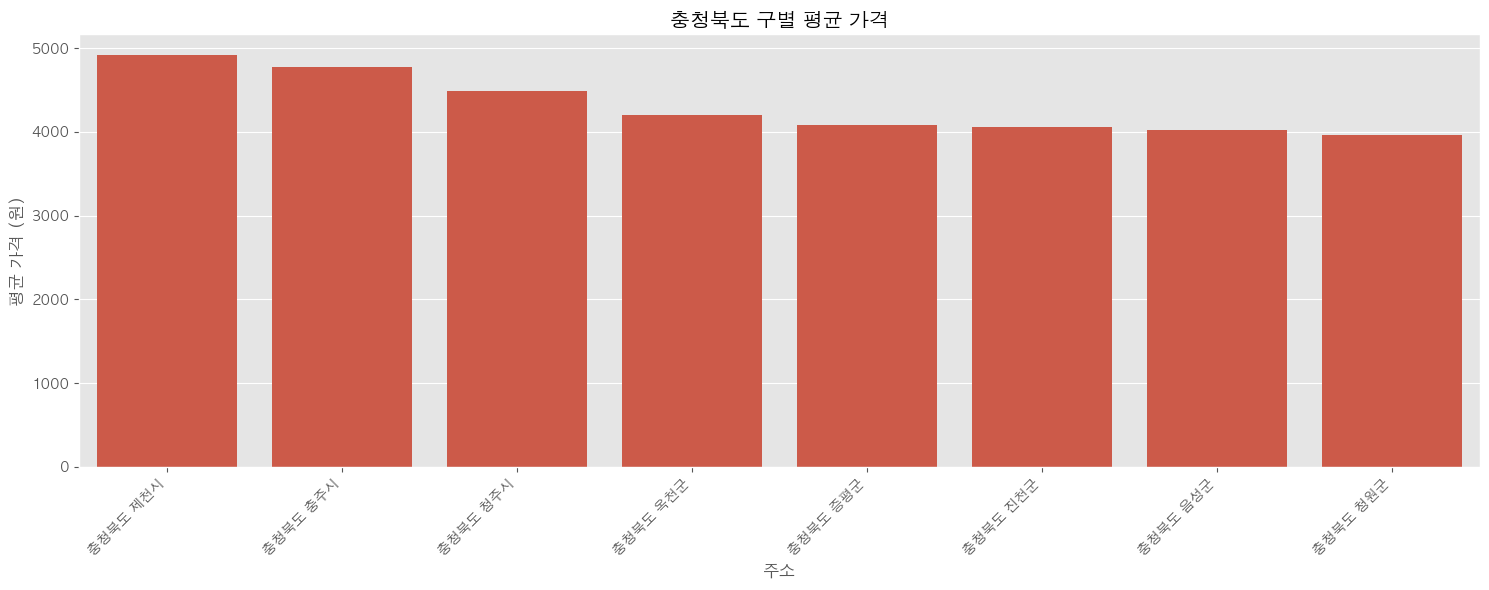

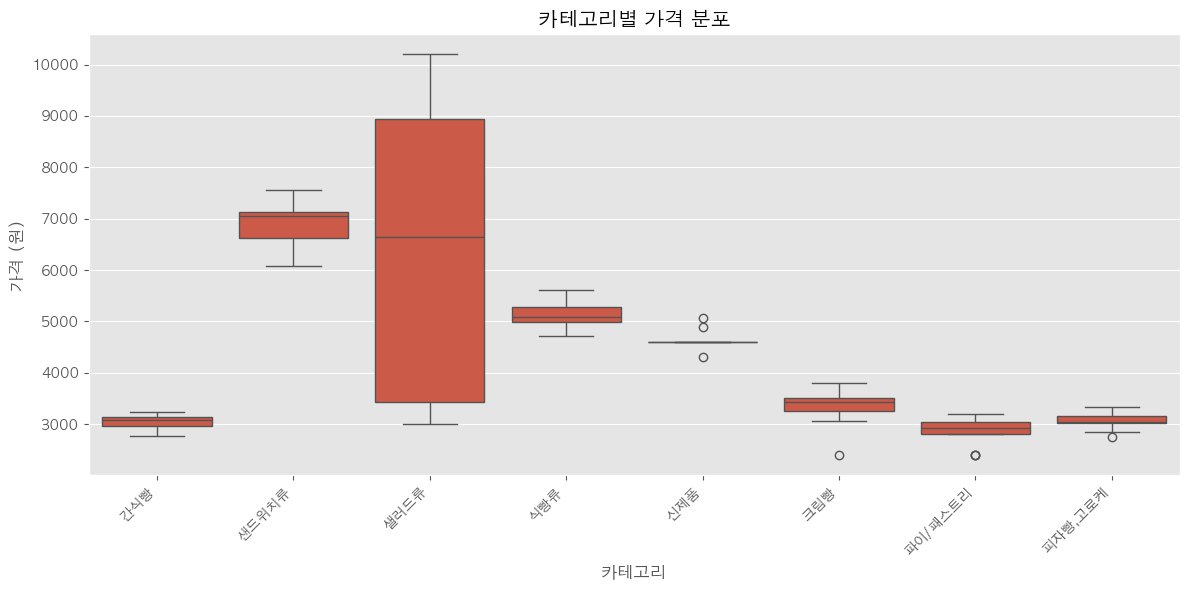

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc

# Mac OS 용 폰트 설정
plt.rc('font', family='AppleGothic') # 맥용 폰트 설정

# 그래프 기본 설정
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')


# 1. 구별 전체 평균 가격 분석
plt.figure(figsize=(15, 6))
grouped_data = result.groupby('주소')[['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']].mean().mean(axis=1).sort_values(ascending=False)

sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.title('충청북도 구별 평균 가격')
plt.xticks(rotation=45, ha='right')
plt.ylabel('평균 가격 (원)')
plt.tight_layout()
plt.show()

# 2. 카테고리별 가격 분포 (박스플롯)
plt.figure(figsize=(12, 6))
categories = ['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']
data_melted = pd.melt(result, value_vars=categories)

sns.boxplot(x='variable', y='value', data=data_melted)
plt.title('카테고리별 가격 분포')
plt.xticks(rotation=45, ha='right')
plt.xlabel('카테고리')
plt.ylabel('가격 (원)')
plt.tight_layout()
plt.show()

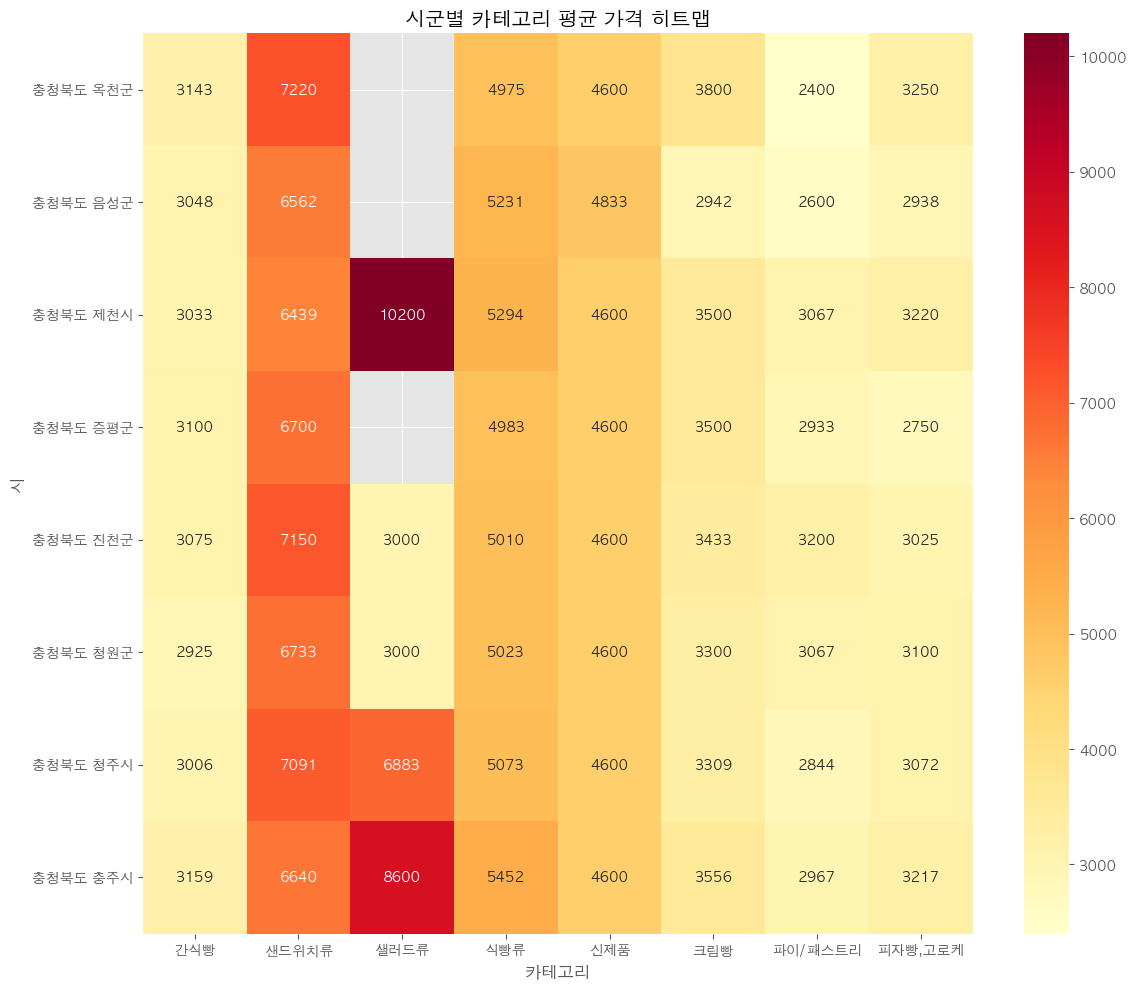

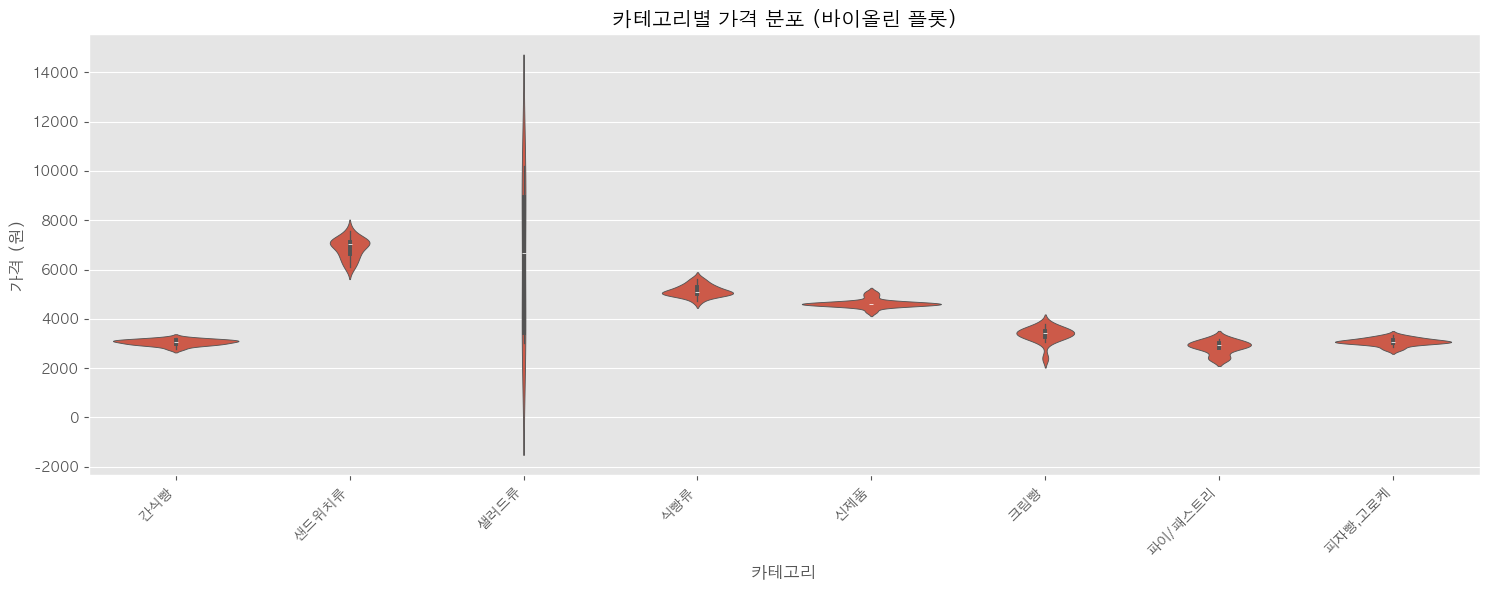

In [13]:
# 3. 구별/카테고리별 평균 가격 히트맵
plt.figure(figsize=(12, 10))
pivot_data = result.groupby('주소')[categories].mean()
sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('시군별 카테고리 평균 가격 히트맵')
plt.ylabel('시')
plt.xlabel('카테고리')
plt.tight_layout()
plt.show()

# 5. 카테고리별 가격 분포 (바이올린 플롯)
plt.figure(figsize=(15, 6))
sns.violinplot(x='variable', y='value', data=data_melted)
plt.title('카테고리별 가격 분포 (바이올린 플롯)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('카테고리')
plt.ylabel('가격 (원)')
plt.tight_layout()
plt.show()

전처리 후 구별 빵가격 데이터:
    구분       평균_빵가격
0  옥천군  4198.271429
1  음성군  4021.835714
2  제천시  4919.125000
3  증평군  4080.942857
4  진천군  4061.662500
5  청원군  3968.512500
6  청주시  4484.939583
7  충주시  4773.718750

전처리 후 아파트 가격 데이터:
     구분     매매   전세
1   단양군  476.0  260
2   보은군  543.0  331
3   영동군  353.0  242
4   옥천군  490.0  349
5   음성군  564.0  398
6   제천시  536.0  412
7   증평군  586.0  471
8   진천군  673.0  493
9   청원군  282.0  205
10  청주시  782.0  629
11  충주시  612.0  479

병합된 데이터:
    구분       평균_빵가격     매매
0  옥천군  4198.271429  490.0
1  음성군  4021.835714  564.0
2  제천시  4919.125000  536.0
3  증평군  4080.942857  586.0
4  진천군  4061.662500  673.0
5  청원군  3968.512500  282.0
6  청주시  4484.939583  782.0
7  충주시  4773.718750  612.0

상관계수: 0.310
양의 상관관계가 있습니다: 아파트 가격이 높은 구일수록 빵 가격도 높은 경향이 있습니다.


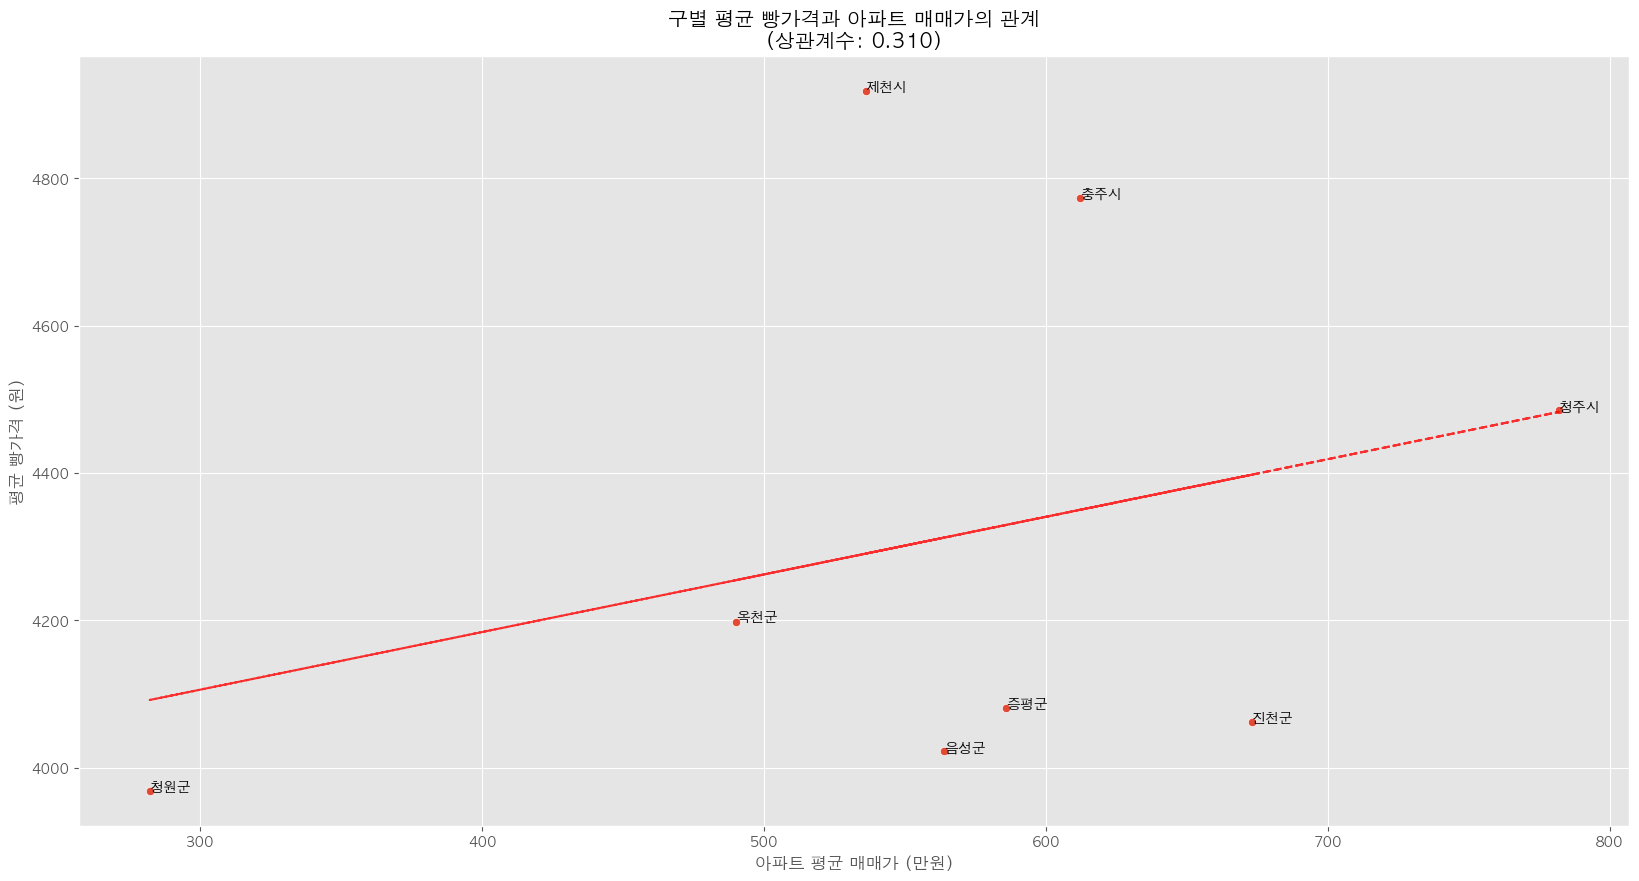

In [14]:
# 1. 구별 평균 빵가격 계산
categories = ['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']
bread_price_by_district = result.groupby('주소')[categories].mean().mean(axis=1).reset_index()
bread_price_by_district.columns = ['구분', '평균_빵가격']
# '경상북도'제거
bread_price_by_district['구분'] = bread_price_by_district['구분'].str.replace('충청북도', '').str.strip()

# 아파트 가격 데이터 전처리
apt_price = pd.read_csv('anal_chungbuk/chungbuk_APT_PRICE.csv')
# '충청북도'와 '구' 제거
apt_price['구분'] = apt_price['구분'].str.replace('충청북도', '').str.strip()

apt_price['매매'] = pd.to_numeric(apt_price['매매'].str.replace(',', ''), errors='coerce')
apt_price = apt_price.dropna()  # 결측치 제거


# 데이터 확인
print("전처리 후 구별 빵가격 데이터:")
print(bread_price_by_district)
print("\n전처리 후 아파트 가격 데이터:")
print(apt_price)

# 데이터 병합
merged_df = pd.merge(bread_price_by_district, apt_price[['구분', '매매']], on='구분', how='inner')
print("\n병합된 데이터:")
print(merged_df)

# 시각화
if not merged_df.empty:
    plt.figure(figsize=(20, 10))
    sns.scatterplot(data=merged_df, x='매매', y='평균_빵가격')
    
    # 추세선 추가
    x = merged_df['매매'].values
    y = merged_df['평균_빵가격'].values
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), "r--", alpha=0.8)
    
    # 각 점에 구 이름 표시
    for idx, row in merged_df.iterrows():
        plt.annotate(row['구분'], (row['매매'], row['평균_빵가격']))
    
    correlation = merged_df['평균_빵가격'].corr(merged_df['매매'])
    plt.title(f'구별 평균 빵가격과 아파트 매매가의 관계\n(상관계수: {correlation:.3f})')
    plt.xlabel('아파트 평균 매매가 (만원)')
    plt.ylabel('평균 빵가격 (원)')

    print(f"\n상관계수: {correlation:.3f}")
    if correlation > 0:
        print("양의 상관관계가 있습니다: 아파트 가격이 높은 구일수록 빵 가격도 높은 경향이 있습니다.")
    else:
        print("음의 상관관계가 있습니다: 아파트 가격이 높은 구일수록 빵 가격이 낮은 경향이 있습니다.")